In [2]:
import numpy as np
from graph import FunctionGrapher as graph
import matplotlib.pyplot as plt



# Numerical Integration

Basics: Riemann Sums:
$$ A = \sum^n_{i=1} f(x_i) \Delta x$$
Trapezoidal Rule:
$$ A = \frac{\Delta x}{2} \left[ f(x_0) + 2f(x_1) + 2f(x_2) + ... + 2f(x_{n-1}) + f(x_n) \right]$$
Simpson's Rule:
$$ A = \frac{\Delta x}{3} \left[ f(x_0) + 4f(x_1) + 2f(x_2) + 4f(x_3) + ... + 2f(x_{n-1}) + f(x_n) \right]$$
Composite Simpson's Rule:
$$ A = \frac{h}{3} \left[ f(x_0) + 4f(x_1) + 2f(x_2) + 4f(x_3) + ... + 2f(x_{n-1}) + f(x_n) \right]$$
where $h = \frac{b-a}{n}$


In [3]:
def f(x):
    return np.sqrt(1-(x)**2) #semicircle

def Riemann(f, a, b, N):
    h = (b-a)/N
    x = np.linspace(a, b, N)
    y=f(x)
    return h*np.sum(y)

print(Riemann(f,-1,1,1000),np.pi/2)


1.5691729158636196 1.5707963267948966


In [28]:
def f(x):
    return np.e**(-x**2)  # semicircle

def Riemann(f, a, b, N, method='left'):
    h = (b - a) / N
    if method == 'left':
        x = np.linspace(a, b - h, N)  # Left endpoints
    elif method == 'right':
        x = np.linspace(a + h, b, N)  # Right endpoints
    elif method == 'mid':
        x = np.linspace(a + h/2, b - h/2, N)  # Midpoint
        
    y = f(x)
    return h * np.sum(y), x, y

def plot_riemann(f, a, b, N, method='left'):
    R_sum, x, y = Riemann(f, a, b, N, method)

    # Prepare data for plotting
    x_plot = np.linspace(a, b, 100)  # all x values for function plot
    y_plot = f(x_plot)

    # Create the figure and axis
    plt.figure(figsize=(10, 6))
    plt.plot(x_plot, y_plot, label='f(x)', color='blue')
    plt.axhline(0, color='black', lw=1.5, ls='-')
    plt.axvline(0, color='black', lw=1.5, ls='-')
    plt.title(f'Riemann Sum ({method.capitalize()} Riemann Sum) for f(x)')
    plt.xlabel('x')
    plt.ylabel('f(x)')
    plt.fill_between(x, y, 0, alpha=0.5, label='Riemann Sums', color='orange')
    plt.grid()
    plt.legend()
    plt.xlim(a, b)
    plt.ylim(f(a), f(b))

    # Show the plot
    plt.show()

def f(x):
    return -2*np.e**(-x**2)*np.sin(x)+np.e**(-x**2)*np.cos(x)+7

# Left, right, and midpoint Riemann sums
def Riemann(f, a, b, N, method='left'):
    width = (b - a) / N
    total_area = 0
    for i in range(N):
        if method == 'left':
            x = a + i * width
        elif method == 'right':
            x = a + (i + 1) * width
        elif method == 'mid':
            x = a + (i + 0.5) * width
        total_area += f(x) * width
    return total_area

# Trapezoidal Rule
def trapezoid(f, a, b, N):
    width = (b - a) / N
    total = 0.5 * (f(a) + f(b))
    for i in range(1, N):
        total += f(a + i * width)
    return total * width

# Simpson's Rule (composite Simpson's rule; requires N even)
def simpson(f, a, b, N):
    if N % 2 != 0:
        raise ValueError("Simpson's rule requires an even number of subintervals (N must be even).")
    width = (b - a) / N
    total = f(a) + f(b)
    for i in range(1, N):
        x = a + i * width
        if i % 2 == 0:
            total += 2 * f(x)
        else:
            total += 4 * f(x)
    return total * width / 3

# Exact integral of f(x) = x^2 + x: ∫ f(x) dx = x^3/3 + x^2/2
def exact_integral(x):
    return np.e**(-x**2)*np.sin(x)+7*x


# Set integration limits and number of subintervals
a = 0
b = 10
N = 4  # For Simpson's rule, N must be even

# Compute approximations
left = Riemann(f, a, b, N, method='left')
right = Riemann(f, a, b, N, method='right')
mid = Riemann(f, a, b, N, method='mid')
trap = trapezoid(f, a, b, N)
simp = simpson(f, a, b, N)

# Compute the exact value
exact_value = exact_integral(b) - exact_integral(a)

# Print the results
print("Left Riemann Sum:", left)
print("Right Riemann Sum:", right)
print("Midpoint Riemann Sum:", mid)
print("Trapezoidal Rule:", trap)
print("Simpson's Rule:", simp)
print("Exact Integral:", exact_value)

# Comparison of the different methods
print("Difference between left and exact:", abs(left - exact_value))
print("Difference between right and exact:", abs(right - exact_value))
print("Difference between midpoint and exact:", abs(mid - exact_value))
print("Difference between trapezoidal and exact:", abs(trap - exact_value))
print("Difference between Simpson's and exact:", abs(simp - exact_value))

Left Riemann Sum: 72.49035695743056
Right Riemann Sum: 69.99035695743056
Midpoint Riemann Sum: 69.1706486121376
Trapezoidal Rule: 71.24035695743056
Simpson's Rule: 70.82047594318979
Exact Integral: 70.0
Difference between left and exact: 2.4903569574305635
Difference between right and exact: 0.009643042569436489
Difference between midpoint and exact: 0.8293513878624026
Difference between trapezoidal and exact: 1.2403569574305635
Difference between Simpson's and exact: 0.8204759431897912


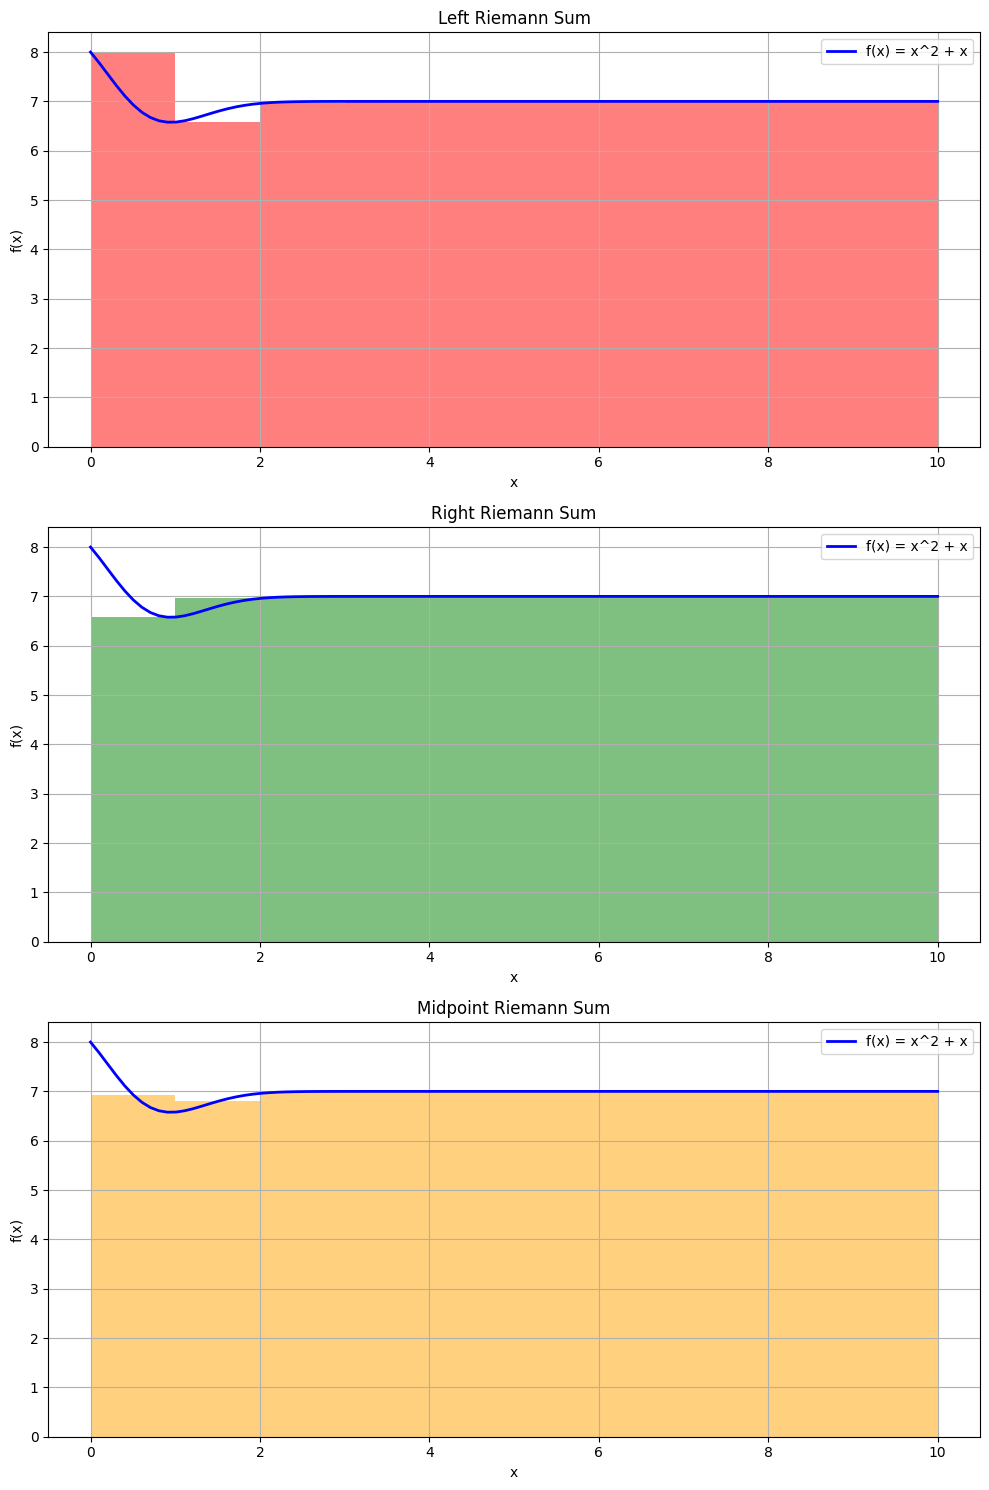

In [29]:
import numpy as np
import matplotlib.pyplot as plt


def f(x):
    return -2*np.e**(-x**2)*np.sin(x)+np.e**(-x**2)*np.cos(x)+7

def Riemann(f, a, b, N, method='left'):
    width = (b - a) / N
    total_area = 0
    
    for i in range(N):
        if method == 'left':
            x = a + i * width
        elif method == 'right':
            x = a + (i + 1) * width
        elif method == 'mid':
            x = a + (i + 0.5) * width
        total_area += f(x) * width
    
    return total_area

# Example usage
a = 0
b = 10
N = 10  # Number of rectangles

x_values = np.linspace(a, b, 100)
y_values = f(x_values)

# Prepare for plotting Riemann sums
width = (b - a) / N
Rectangles_left = []
Rectangles_right = []
Rectangles_mid = []

# Collecting rectangle data
for i in range(N):
    # Left
    lx = a + i * width
    Rectangles_left.append((lx, f(lx)))
    
    # Right
    rx = a + (i + 1) * width
    Rectangles_right.append((rx, f(rx)))
    
    # Mid
    mx = a + (i + 0.5) * width
    Rectangles_mid.append((mx, f(mx)))

# Creating subplots
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Plotting left Riemann sum
axs[0].plot(x_values, y_values, label='f(x) = x^2 + x', color='blue', linewidth=2)
for lx, ly in Rectangles_left:
    axs[0].bar(lx, ly, width=width, color='red', alpha=0.5, align='edge')
axs[0].set_title('Left Riemann Sum')
axs[0].set_xlabel('x')
axs[0].set_ylabel('f(x)')
axs[0].legend()
axs[0].grid()

# Plotting right Riemann sum
axs[1].plot(x_values, y_values, label='f(x) = x^2 + x', color='blue', linewidth=2)
for rx, ry in Rectangles_right:
    axs[1].bar(rx - width, ry, width=width, color='green', alpha=0.5, align='edge')
axs[1].set_title('Right Riemann Sum')
axs[1].set_xlabel('x')
axs[1].set_ylabel('f(x)')
axs[1].legend()
axs[1].grid()

# Plotting midpoint Riemann sum
axs[2].plot(x_values, y_values, label='f(x) = x^2 + x', color='blue', linewidth=2)
for mx, my in Rectangles_mid:
    axs[2].bar(mx - width/2, my, width=width, color='orange', alpha=0.5, align='edge')
axs[2].set_title('Midpoint Riemann Sum')
axs[2].set_xlabel('x')
axs[2].set_ylabel('f(x)')
axs[2].legend()
axs[2].grid()

plt.tight_layout()
plt.show()

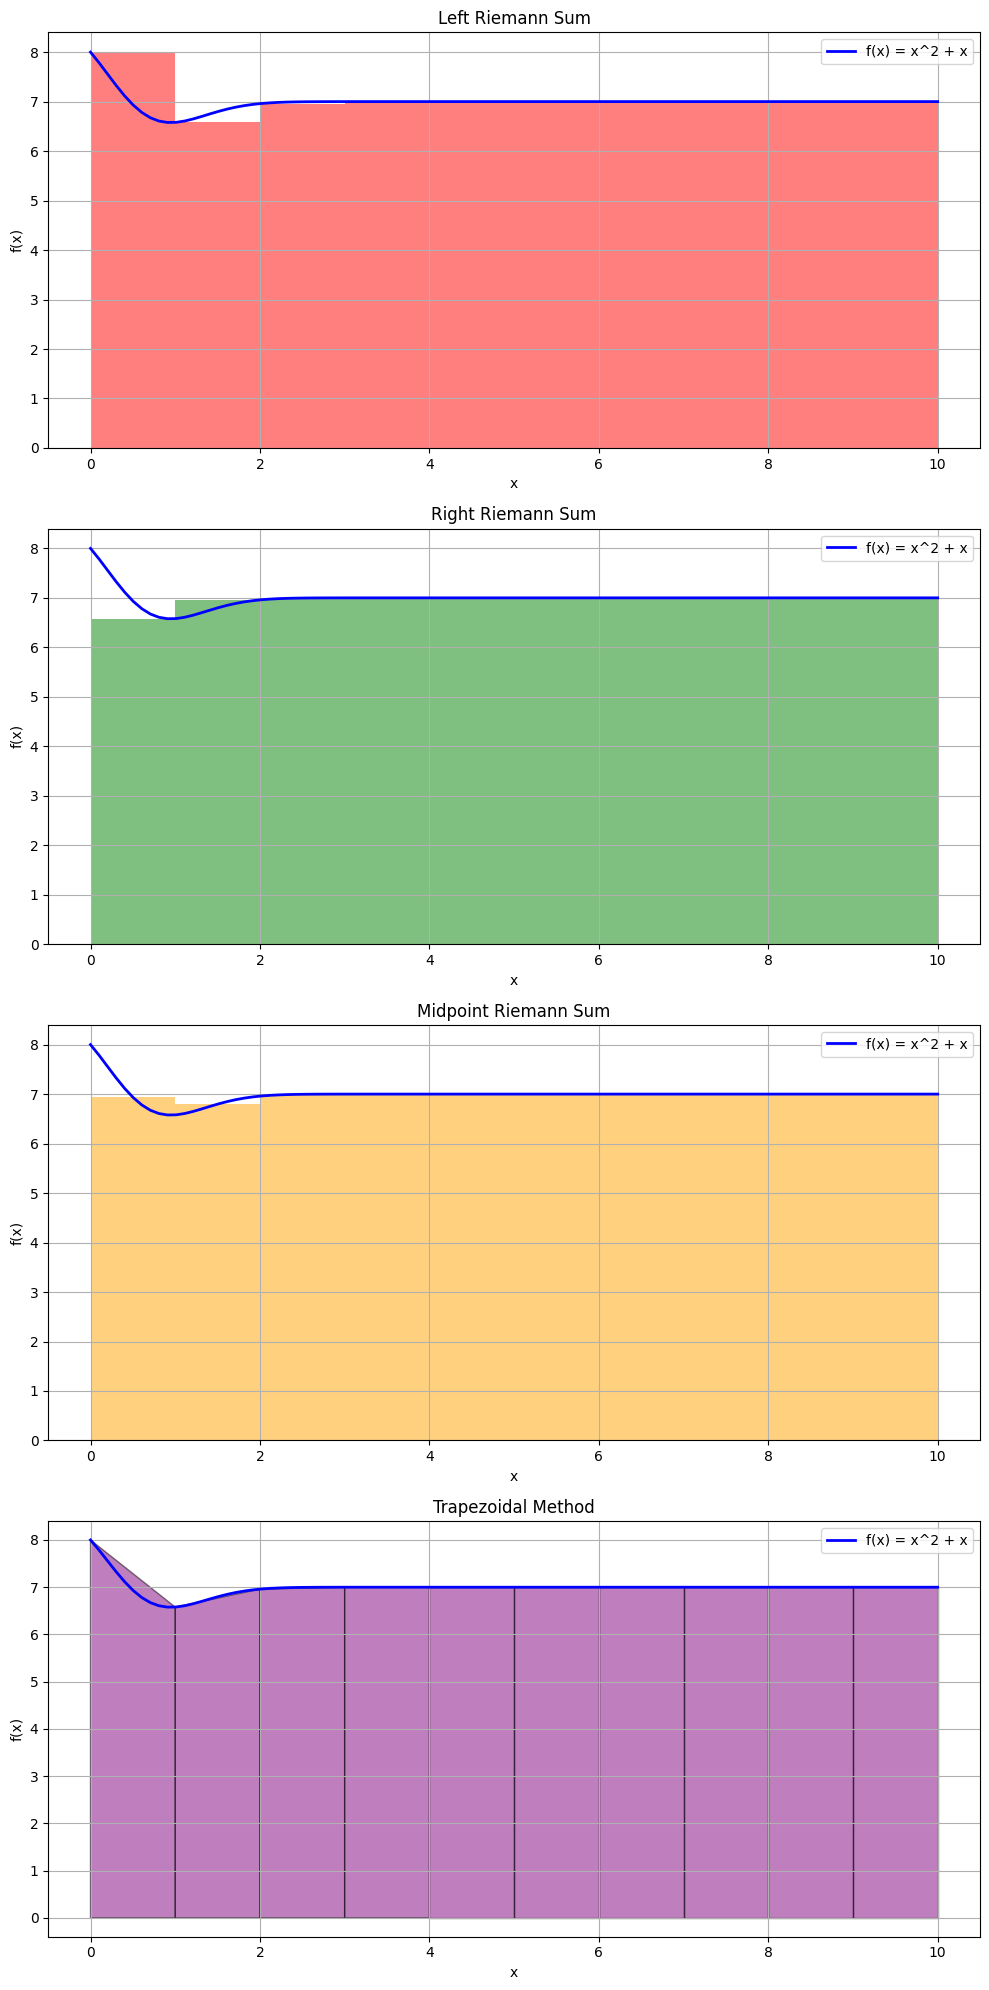

In [30]:
def f(x):
    return -2*np.e**(-x**2)*np.sin(x)+np.e**(-x**2)*np.cos(x)+7

def Riemann(f, a, b, N, method='left'):
    width = (b - a) / N
    total_area = 0
    
    for i in range(N):
        if method == 'left':
            x = a + i * width
        elif method == 'right':
            x = a + (i + 1) * width
        elif method == 'mid':
            x = a + (i + 0.5) * width
        total_area += f(x) * width
    
    return total_area

# Example usage
a = 0
b = 10
N = 10  # Number of subintervals

x_values = np.linspace(a, b, 100)
y_values = f(x_values)

width = (b - a) / N
Rectangles_left = []
Rectangles_right = []
Rectangles_mid = []

for i in range(N):
    # Left
    lx = a + i * width
    Rectangles_left.append((lx, f(lx)))
    
    # Right
    rx = a + (i + 1) * width
    Rectangles_right.append((rx, f(rx)))
    
    # Midpoint
    mx = a + (i + 0.5) * width
    Rectangles_mid.append((mx, f(mx)))

# Creating subplots with an extra one for the trapezoidal method
fig, axs = plt.subplots(4, 1, figsize=(10, 20))

# Plotting left Riemann sum
axs[0].plot(x_values, y_values, label='f(x) = x^2 + x', color='blue', linewidth=2)
for lx, ly in Rectangles_left:
    axs[0].bar(lx, ly, width=width, color='red', alpha=0.5, align='edge')
axs[0].set_title('Left Riemann Sum')
axs[0].set_xlabel('x')
axs[0].set_ylabel('f(x)')
axs[0].legend()
axs[0].grid()

# Plotting right Riemann sum (shifted left by width)
axs[1].plot(x_values, y_values, label='f(x) = x^2 + x', color='blue', linewidth=2)
for rx, ry in Rectangles_right:
    axs[1].bar(rx - width, ry, width=width, color='green', alpha=0.5, align='edge')
axs[1].set_title('Right Riemann Sum')
axs[1].set_xlabel('x')
axs[1].set_ylabel('f(x)')
axs[1].legend()
axs[1].grid()

# Plotting midpoint Riemann sum (adjusted so bar centers are correct)
axs[2].plot(x_values, y_values, label='f(x) = x^2 + x', color='blue', linewidth=2)
for mx, my in Rectangles_mid:
    axs[2].bar(mx - width/2, my, width=width, color='orange', alpha=0.5, align='edge')
axs[2].set_title('Midpoint Riemann Sum')
axs[2].set_xlabel('x')
axs[2].set_ylabel('f(x)')
axs[2].legend()
axs[2].grid()

# Plotting trapezoidal method
axs[3].plot(x_values, y_values, label='f(x) = x^2 + x', color='blue', linewidth=2)
for i in range(N):
    x0 = a + i * width
    x1 = a + (i + 1) * width
    y0 = f(x0)
    y1 = f(x1)
    # Create polygon vertices for the trapezoid:
    xs = [x0, x0, x1, x1]
    ys = [0, y0, y1, 0]
    axs[3].fill(xs, ys, color='purple', alpha=0.5, edgecolor='black')
axs[3].set_title('Trapezoidal Method')
axs[3].set_xlabel('x')
axs[3].set_ylabel('f(x)')
axs[3].legend()
axs[3].grid()

plt.tight_layout()
plt.show()

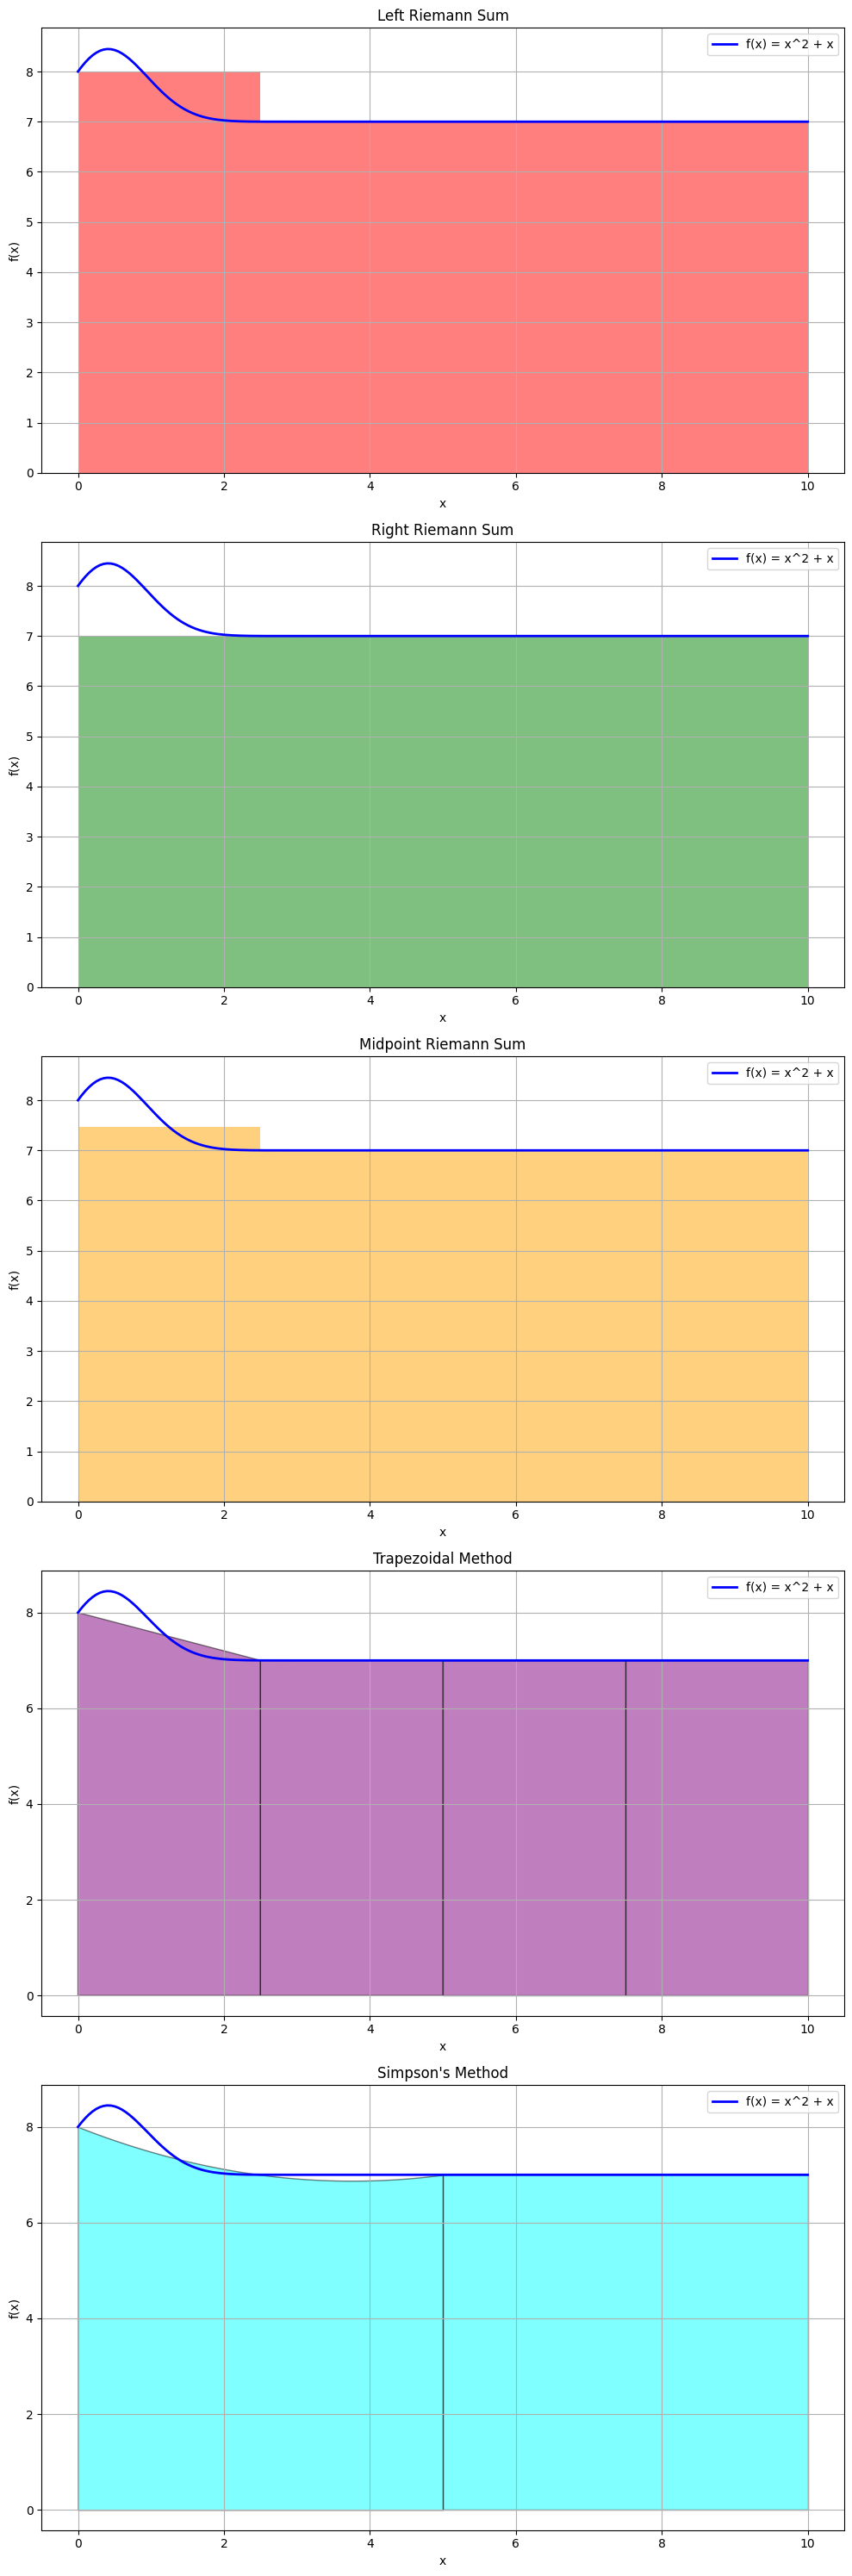

In [31]:
def f(x):
    return 2*np.e**(-x**2)*np.sin(x)+np.e**(-x**2)*np.cos(x)+7

# Simpson's method function for numerical integration
def simpson(f, a, b, N):
    if N % 2 != 0:
        raise ValueError("N must be even for Simpson's rule.")
    width = (b - a) / N
    total_area = f(a) + f(b)
    for i in range(1, N):
        x = a + i * width
        if i % 2 == 0:
            total_area += 2 * f(x)
        else:
            total_area += 4 * f(x)
    return total_area * width / 3

# Example usage
a = 0
b = 10
N = 4  # Number of subintervals (even for Simpson's rule)

x_values = np.linspace(a, b, 200)
y_values = f(x_values)

width = (b - a) / N
Rectangles_left = []
Rectangles_right = []
Rectangles_mid = []

for i in range(N):
    # Left endpoint
    lx = a + i * width
    Rectangles_left.append((lx, f(lx)))
    
    # Right endpoint
    rx = a + (i + 1) * width
    Rectangles_right.append((rx, f(rx)))
    
    # Midpoint
    mx = a + (i + 0.5) * width
    Rectangles_mid.append((mx, f(mx)))

# Create subplots (adding one for Simpson's method)
fig, axs = plt.subplots(5, 1, figsize=(10, 30))

# Left Riemann Sum
axs[0].plot(x_values, y_values, label='f(x) = x^2 + x', color='blue', linewidth=2)
for lx, ly in Rectangles_left:
    axs[0].bar(lx, ly, width=width, color='red', alpha=0.5, align='edge')
axs[0].set_title('Left Riemann Sum')
axs[0].set_xlabel('x')
axs[0].set_ylabel('f(x)')
axs[0].legend()
axs[0].grid()

# Right Riemann Sum (shifted left by width)
axs[1].plot(x_values, y_values, label='f(x) = x^2 + x', color='blue', linewidth=2)
for rx, ry in Rectangles_right:
    axs[1].bar(rx - width, ry, width=width, color='green', alpha=0.5, align='edge')
axs[1].set_title('Right Riemann Sum')
axs[1].set_xlabel('x')
axs[1].set_ylabel('f(x)')
axs[1].legend()
axs[1].grid()

# Midpoint Riemann Sum (adjusted so bar centers are correct)
axs[2].plot(x_values, y_values, label='f(x) = x^2 + x', color='blue', linewidth=2)
for mx, my in Rectangles_mid:
    axs[2].bar(mx - width/2, my, width=width, color='orange', alpha=0.5, align='edge')
axs[2].set_title('Midpoint Riemann Sum')
axs[2].set_xlabel('x')
axs[2].set_ylabel('f(x)')
axs[2].legend()
axs[2].grid()

# Trapezoidal Method
axs[3].plot(x_values, y_values, label='f(x) = x^2 + x', color='blue', linewidth=2)
for i in range(N):
    x0 = a + i * width
    x1 = a + (i + 1) * width
    y0 = f(x0)
    y1 = f(x1)
    # Define the vertices of the trapezoid
    xs = [x0, x0, x1, x1]
    ys = [0, y0, y1, 0]
    axs[3].fill(xs, ys, color='purple', alpha=0.5, edgecolor='black')
axs[3].set_title('Trapezoidal Method')
axs[3].set_xlabel('x')
axs[3].set_ylabel('f(x)')
axs[3].legend()
axs[3].grid()

# Simpson's Method Visualization
axs[4].plot(x_values, y_values, label='f(x) = x^2 + x', color='blue', linewidth=2)
# Simpson's rule uses pairs of subintervals, so iterate with a step of 2
for i in range(0, N, 2):
    # Define three points: endpoints and midpoint for the pair of intervals
    x0 = a + i * width
    x1 = a + (i + 1) * width
    x2 = a + (i + 2) * width
    y0 = f(x0)
    y1 = f(x1)
    y2 = f(x2)
    
    # Fit a quadratic polynomial through the three points
    coeffs = np.polyfit([x0, x1, x2], [y0, y1, y2], 2)
    poly = np.poly1d(coeffs)
    
    # Create a smooth set of x-values for plotting the parabola over [x0, x2]
    x_parabola = np.linspace(x0, x2, 100)
    y_parabola = poly(x_parabola)
    
    # Fill the area under the parabolic arc
    axs[4].fill_between(x_parabola, y_parabola, color='cyan', alpha=0.5, edgecolor='black')

axs[4].set_title("Simpson's Method")
axs[4].set_xlabel('x')
axs[4].set_ylabel('f(x)')
axs[4].legend()
axs[4].grid()

plt.tight_layout()
plt.show()

Composite Simpson's Rule Approximation: 383.3333333333333


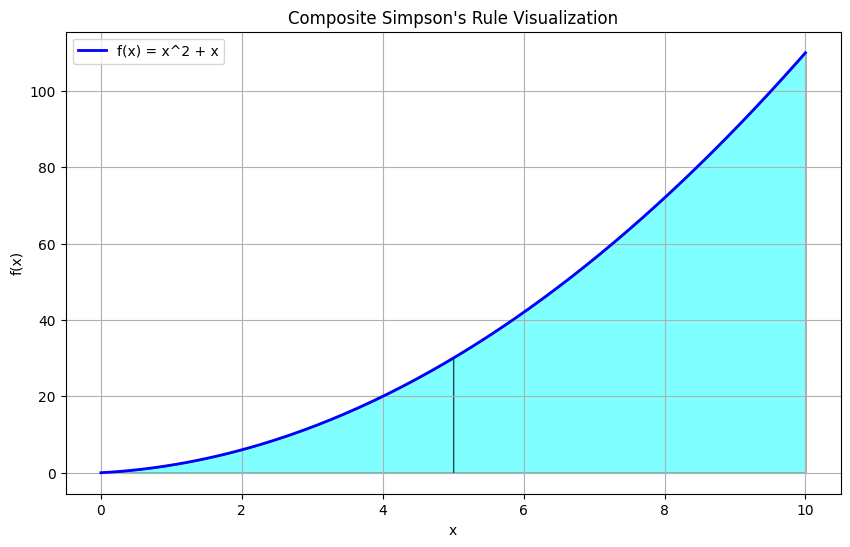

In [23]:

def f(x):
    return x**2 + x

# Composite Simpson's rule for numerical integration
def composite_simpson(f, a, b, N):
    if N % 2 != 0:
        raise ValueError("N must be even for composite Simpson's rule.")
    width = (b - a) / N
    total_area = f(a) + f(b)
    for i in range(1, N):
        x = a + i * width
        if i % 2 == 0:
            total_area += 2 * f(x)
        else:
            total_area += 4 * f(x)
    return total_area * width / 3

# Example usage
a = 0
b = 10
N = 4  # N must be even

x_values = np.linspace(a, b, 200)
y_values = f(x_values)

# Calculate the composite Simpson's approximation
simpson_value = composite_simpson(f, a, b, N)
print("Composite Simpson's Rule Approximation:", simpson_value)

# Visualization of composite Simpson's method
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, label='f(x) = x^2 + x', color='blue', linewidth=2)

width = (b - a) / N
# Simpson's rule applies over pairs of intervals, so iterate with step of 2
for i in range(0, N, 2):
    x0 = a + i * width
    x1 = a + (i + 1) * width
    x2 = a + (i + 2) * width
    y0, y1, y2 = f(x0), f(x1), f(x2)
    
    # Fit a quadratic polynomial (parabola) through the three points
    coeffs = np.polyfit([x0, x1, x2], [y0, y1, y2], 2)
    poly = np.poly1d(coeffs)
    
    # Create a smooth curve for the parabola over the interval [x0, x2]
    x_parabola = np.linspace(x0, x2, 100)
    y_parabola = poly(x_parabola)
    
    # Fill the area under the parabolic arc to represent the Simpson's approximation
    plt.fill_between(x_parabola, y_parabola, color='cyan', alpha=0.5, edgecolor='black')

plt.title("Composite Simpson's Rule Visualization")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.legend()
plt.grid()
plt.show()

In [18]:
def f(x):
    return np.sqrt(1-(x)**2) #semicircle

def g(x):
    return (x**4*(1-x)**4/(1+x**2))

#composite simpsons rule
def CSR(f, a, b, N):
    h = (b-a)/N
    XI0 = f(a) + f(b)
    XI1 = 0
    XI2 = 0
    for i in range(N-1):
        X = a+i*h
        if i%2 == 0:
            XI2 = XI2 +f(X)
        else:
            XI1 = XI1 + f(X)
    XI = h*(XI0 + 2 * XI2 + 4 * XI1)/3
    return XI 


In [17]:
def romberg_integration(f, a, b, n):
    h = b - a
    R = [[0] * (n+1) for _ in range(n+1)]

    R[0][0] = 0.5 * h * (f(a) + f(b))

    power_of_two = 1
    for i in range(1, n+1):
        h /= 2
        total = 0

        power_of_two *= 2
        for k in range(1, power_of_two, 2):
            total += f(a + k * h)

        R[i][0] = 0.5 * (R[i-1][0] + h * total)

        for j in range(1, i+1):
            R[i][j] = R[i][j-1] + (R[i][j-1] - R[i-1][j-1]) / ((4 ** j) - 1)

    return R[n][n]

# Define the function f(x)
def f(x):
    return x ** 2

# Define the limits of integration
a = 0
b = 2

# Set the desired order of accuracy
n = 15

# Call the Romberg integration function
result = romberg_integration(f, a, b, n)
print(result)

1.33337051288114
